In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [51]:
regional_avg = pd.read_csv('../data/regional_avg.csv')
display(regional_avg)

,region,series_name,avg_2004,avg_2005,avg_2006,avg_2007,avg_2008,avg_2009,avg_2010,avg_2011,...,avg_2014,avg_2015,avg_2016,avg_2017,avg_2018,avg_2019,avg_2020,avg_2021,avg_2022,avg_2023
0,East Asia & Pacific,Adjusted net national income per capita (annua...,-1.512167,23.460558,1.281121,-44.894272,3.568772,1.074697,6.475594,3.493220,...,0.845217,2.814854,3.998694,3.173480,2.549415,5.770884,-5.292673,-5.195983,NaN,NaN
1,East Asia & Pacific,Tax revenue (% of GDP),16.759337,16.237278,16.403712,16.077328,15.606088,14.718146,20.090754,22.108339,...,18.391181,16.767066,16.195772,16.601713,17.854975,17.833829,16.563438,15.628938,15.560307,NaN
2,East Asia & Pacific,Research and development expenditure (% of GDP),1.004969,1.023154,1.265481,1.236884,1.487319,1.163049,1.612713,1.289743,...,1.593820,1.298633,1.358836,1.349014,1.222700,1.415035,1.538153,1.534751,0.420225,NaN
3,East Asia & Pacific,GDP growth (annual %),4.665142,3.777532,3.771657,4.606493,4.565715,0.173882,5.343991,4.821710,...,3.797625,3.501806,4.413252,3.816133,2.557849,3.709331,-4.544788,2.065065,1.748244,5.318012
4,East Asia & Pacific,GDP per capita (constant 2015 US$),12695.959437,12974.786106,13327.317242,13770.357241,13781.824259,13466.812930,14271.035066,14905.883769,...,15856.355136,15971.267840,15790.252440,16342.810307,16514.190129,16535.838107,14649.552046,15344.589681,15288.348218,15830.294392
5,East Asia & Pacific,"Employment to population ratio, 15+, total (%)...",61.131000,58.726667,61.174769,62.829706,59.785308,60.611800,60.801348,61.736526,...,61.802714,63.139778,63.721167,61.039200,62.060765,60.594100,60.492947,60.587333,59.159474,63.844273
6,Europe & Central Asia,Research and development expenditure (% of GDP),1.006676,1.022797,1.095401,1.079201,1.157957,1.207112,1.192365,1.238791,...,1.218784,1.274920,1.201665,1.260802,1.257957,1.336730,1.387449,1.450694,0.442648,NaN
7,Europe & Central Asia,Tax revenue (% of GDP),19.730930,20.621085,20.867053,21.218437,20.881924,19.131041,19.007978,19.059691,...,19.620829,19.471257,19.747425,19.488197,19.637273,19.529242,19.019020,19.468697,20.336580,NaN
8,Europe & Central Asia,GDP growth (annual %),5.698695,5.395267,6.535877,6.482909,3.080222,-3.798899,2.438321,2.907102,...,2.556623,2.727992,2.807781,3.411664,3.412115,3.166638,-4.315821,7.378443,3.784847,2.103846
9,Europe & Central Asia,"Employment to population ratio, 15+, total (%)...",53.752405,52.519955,52.911511,52.918979,53.667532,53.128040,53.769511,54.013083,...,53.603500,55.358340,54.832235,55.247271,56.147000,56.350354,55.301213,55.527068,57.623953,57.284027


In [ ]:
## top 2: North America, Europe & Central Asia
## bottom 2: Sub-Saharan Africa & South Asia

In [61]:
nat_income = regional_avg[regional_avg['series_name'].str.contains('Adjusted net')]
income_melt = nat_income.melt(id_vars=['region', 'series_name'], var_name='year', value_name='value')
income_melt['year'] = income_melt['year'].str.replace('avg_', '').astype(int)
income_year_avg = income_melt.groupby(['year', 'region'])['value'].mean().reset_index()
income_top2 = income_year_avg[income_year_avg['region'].isin(['Europe & Central Asia', 'North America'])]
income_bot2 = income_year_avg[income_year_avg['region'].isin(['Sub-Saharan Africa', 'South Asia'])]
display(income_top2)
display(income_bot2)


,year,region,value
1,2004,Europe & Central Asia,6.539557
4,2004,North America,3.757633
8,2005,Europe & Central Asia,6.182148
11,2005,North America,2.308346
15,2006,Europe & Central Asia,7.040982
18,2006,North America,3.264242
22,2007,Europe & Central Asia,6.220922
25,2007,North America,0.682990
29,2008,Europe & Central Asia,2.738302
32,2008,North America,-1.690562


,year,region,value
5,2004,South Asia,3.944210
6,2004,Sub-Saharan Africa,3.455526
12,2005,South Asia,4.759118
13,2005,Sub-Saharan Africa,4.994262
19,2006,South Asia,4.604883
20,2006,Sub-Saharan Africa,118.318299
26,2007,South Asia,5.275417
27,2007,Sub-Saharan Africa,0.872498
33,2008,South Asia,2.083901
34,2008,Sub-Saharan Africa,1.449315


In [80]:
tax_rev = regional_avg[regional_avg['series_name'].str.contains('Tax')]
tax_melt = tax_rev.melt(id_vars=['region', 'series_name'], var_name='year', value_name='value')
tax_melt['year'] = tax_melt['year'].str.replace('avg_', '').astype(int)
tax_rev_avg = tax_melt.groupby(['year', 'region'])['value'].mean().reset_index()
tax_top2 = tax_rev_avg[tax_rev_avg['region'].isin(['Europe & Central Asia', 'North America'])]
tax_bot2 = tax_rev_avg[tax_rev_avg['region'].isin(['Sub-Saharan Africa', 'South Asia'])]
display(tax_top2)
display(tax_bot2)


,year,region,value
1,2004,Europe & Central Asia,19.730930
4,2004,North America,11.441109
8,2005,Europe & Central Asia,20.621085
11,2005,North America,11.990613
15,2006,Europe & Central Asia,20.867053
18,2006,North America,12.329350
22,2007,Europe & Central Asia,21.218437
25,2007,North America,12.312172
29,2008,Europe & Central Asia,20.881924
32,2008,North America,11.333177


,year,region,value
5,2004,South Asia,9.481601
6,2004,Sub-Saharan Africa,14.748024
12,2005,South Asia,9.940290
13,2005,Sub-Saharan Africa,15.546976
19,2006,South Asia,9.836036
20,2006,Sub-Saharan Africa,16.566296
26,2007,South Asia,9.658960
27,2007,Sub-Saharan Africa,16.597800
33,2008,South Asia,9.722192
34,2008,Sub-Saharan Africa,16.563995


In [90]:
employment = regional_avg[regional_avg['series_name'].str.contains('Employment')]
em_melt = employment.melt(id_vars=['region', 'series_name'], var_name='year', value_name='value')
em_melt['year'] = em_melt['year'].str.replace('avg_', '').astype(int)
employment_avg = em_melt.groupby(['year', 'region'])['value'].mean().reset_index()
employment_top2 = employment_avg[employment_avg['region'].isin(['Europe & Central Asia', 'North America'])]
employment_bot2 = employment_avg[employment_avg['region'].isin(['Sub-Saharan Africa', 'South Asia'])]
display(employment_top2)
display(employment_bot2)

,year,region,value
1,2004,Europe & Central Asia,53.752405
4,2004,North America,62.491500
8,2005,Europe & Central Asia,52.519955
11,2005,North America,62.646500
15,2006,Europe & Central Asia,52.911511
18,2006,North America,62.978000
22,2007,Europe & Central Asia,52.918979
25,2007,North America,63.147000
29,2008,Europe & Central Asia,53.667532
32,2008,North America,62.763000


,year,region,value
5,2004,South Asia,49.500000
6,2004,Sub-Saharan Africa,55.722111
12,2005,South Asia,51.879750
13,2005,Sub-Saharan Africa,65.382667
19,2006,South Asia,55.109000
20,2006,Sub-Saharan Africa,60.710364
26,2007,South Asia,49.846000
27,2007,Sub-Saharan Africa,63.529000
33,2008,South Asia,64.594667
34,2008,Sub-Saharan Africa,53.366750


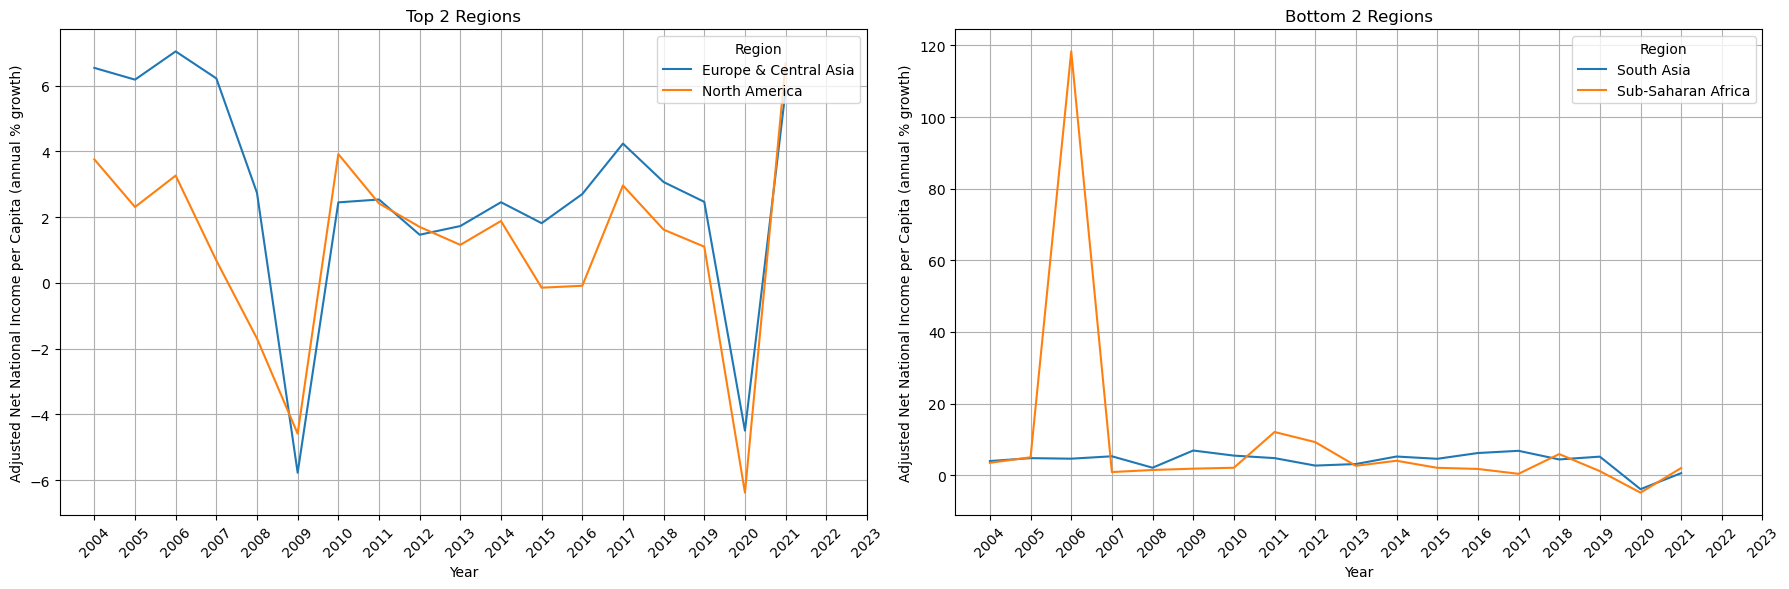

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot for income_top2
for region in income_top2['region'].unique():
    region_data = income_top2[income_top2['region'] == region]
    axes[0].plot(region_data['year'], region_data['value'], label=region)
axes[0].set_xlabel('Year')
axes[0].set_xticks(region_data['year'])
axes[0].set_ylabel('Adjusted Net National Income per Capita (annual % growth)')
axes[0].legend(title='Region', loc='upper right')
axes[0].grid(True)
axes[0].set_title('Top 2 Regions')

# Plot for income_bot2
for region in income_bot2['region'].unique():
    region_data = income_bot2[income_bot2['region'] == region]
    axes[1].plot(region_data['year'], region_data['value'], label=region)
axes[1].set_xlabel('Year')
axes[1].set_xticks(region_data['year'])
axes[1].set_ylabel('Adjusted Net National Income per Capita (annual % growth)')
axes[1].legend(title='Region', loc='upper right')
axes[1].grid(True)
axes[1].set_title('Bottom 2 Regions')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()


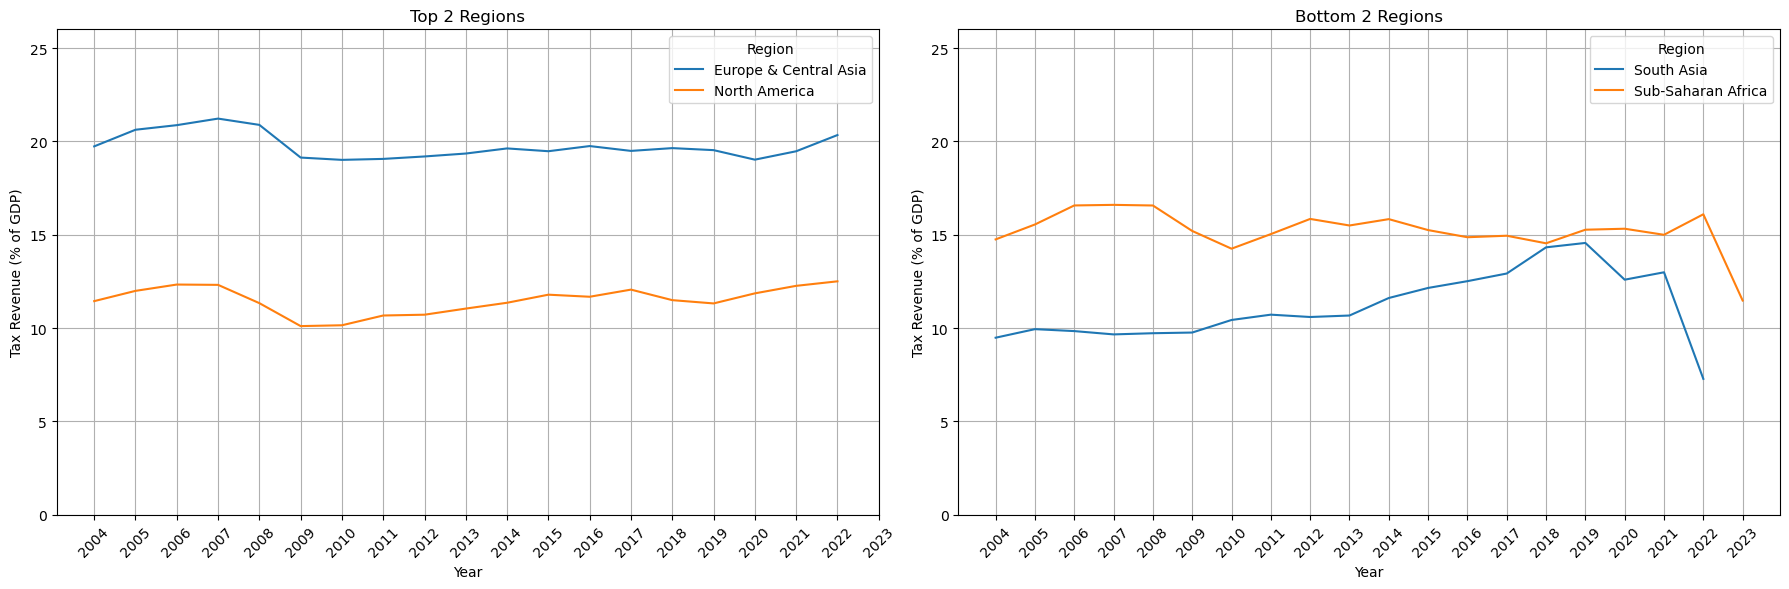

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot for tax_top2
for region in tax_top2['region'].unique():
    region_data = tax_top2[tax_top2['region'] == region]
    axes[0].plot(region_data['year'], region_data['value'], label=region)
axes[0].set_xlabel('Year')
axes[0].set_xticks(region_data['year'])
axes[0].set_ylabel('Tax Revenue (% of GDP)')
axes[0].set_ylim(0, 26)
axes[0].legend(title='Region', loc='upper right')
axes[0].grid(True)
axes[0].set_title('Top 2 Regions')

# Plot for tax_bot2
for region in tax_bot2['region'].unique():
    region_data = tax_bot2[tax_bot2['region'] == region]
    axes[1].plot(region_data['year'], region_data['value'], label=region)
axes[1].set_xlabel('Year')
axes[1].set_xticks(region_data['year'])
axes[1].set_ylabel('Tax Revenue (% of GDP)')
axes[1].set_ylim(0, 26)
axes[1].legend(title='Region', loc='upper right')
axes[1].grid(True)
axes[1].set_title('Bottom 2 Regions')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

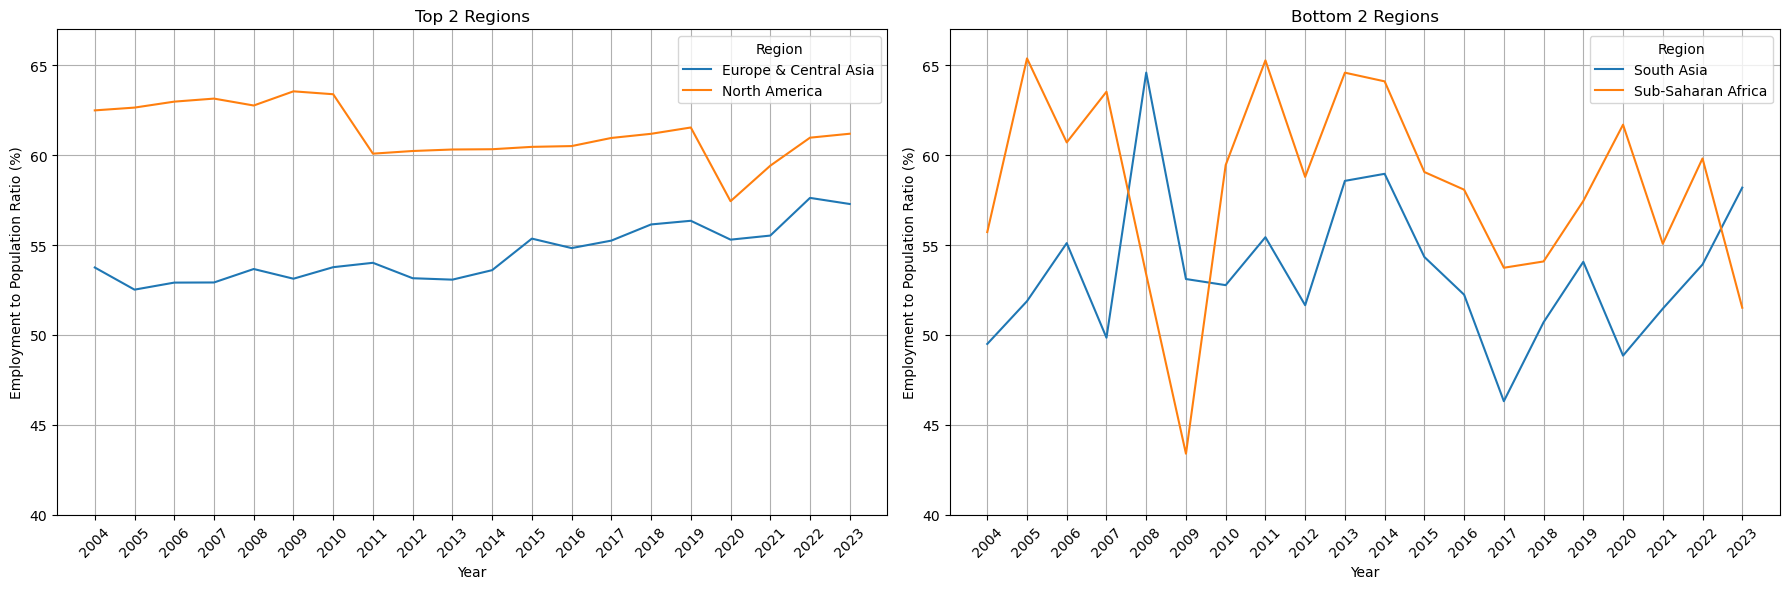

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot for employment_top2
for region in employment_top2['region'].unique():
    region_data = employment_top2[employment_top2['region'] == region]
    axes[0].plot(region_data['year'], region_data['value'], label=region)
axes[0].set_xlabel('Year')
axes[0].set_xticks(region_data['year'])
axes[0].set_ylabel('Employment to Population Ratio (%)')
axes[0].set_ylim(40, 67)
axes[0].legend(title='Region', loc='upper right')
axes[0].grid(True)
axes[0].set_title('Top 2 Regions')

# Plot for employment_bot2
for region in employment_bot2['region'].unique():
    region_data = employment_bot2[employment_bot2['region'] == region]
    axes[1].plot(region_data['year'], region_data['value'], label=region)
axes[1].set_xlabel('Year')
axes[1].set_xticks(region_data['year'])
axes[1].set_ylabel('Employment to Population Ratio (%)')
axes[1].set_ylim(40, 67)
axes[1].legend(title='Region', loc='upper right')
axes[1].grid(True)
axes[1].set_title('Bottom 2 Regions')

for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()